In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, initializers
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import header

In [2]:
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [7]:
def read_data(_path):
    _data = pd.read_csv(_path)
    _data.drop(['Unnamed: 0'], axis="columns", inplace=True)
    return _data

data = read_data("data.csv")
print(header.tag_indexs)
data.head(5)

('摩羯座', '水瓶座', '雙魚座', '牡羊座', '金牛座', '雙子座', '巨蟹座', '獅子座', '處女座', '天秤座', '天蠍座', '射手座')


,tag,day
0,10,297
1,4,126
2,3,97
3,2,73
4,0,359


In [4]:
X_data = data.day
Y_data = data.tag

In [5]:
X_data = (X_data - 1) / (365 - 1)
Y_data = np.array(tf.one_hot(Y_data, 12))

In [6]:
split_1_num = int(X_data.shape[0] * 0.7)
split_2_num = int(X_data.shape[0] * 0.9)
X_train = X_data[:split_1_num]
Y_train = Y_data[:split_1_num]
X_val = X_data[split_1_num:split_2_num]
Y_val = Y_data[split_1_num:split_2_num]
X_test = X_data[split_2_num:]
Y_test = Y_data[split_2_num:]
print(f'X_train = {X_train.shape}, Y_train = {Y_train.shape}')
print(f'X_val = {X_val.shape}, Y_val = {Y_val.shape}')
print(f'X_test = {X_test.shape}, Y_test = {Y_test.shape}')

X_train = (840,), Y_train = (840, 12)
X_val = (240,), Y_val = (240, 12)
X_test = (120,), Y_test = (120, 12)


In [7]:
model = keras.Sequential([
    layers.Flatten(input_shape=(1,), name="input"),
    layers.Dense(32, activation="relu", name="hidden_1", kernel_initializer="he_normal"),
    layers.Dense(32, activation="relu", name="hidden_2", kernel_initializer="he_normal"),
    layers.Dense(32, activation="relu", name="hidden_3", kernel_initializer="he_normal"),
    layers.Dense(12, activation="softmax", name="output")
])
model.summary()
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="BinaryAccuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 1)                 0         
_________________________________________________________________
hidden_1 (Dense)             (None, 32)                64        
_________________________________________________________________
hidden_2 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_3 (Dense)             (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 12)                396       
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


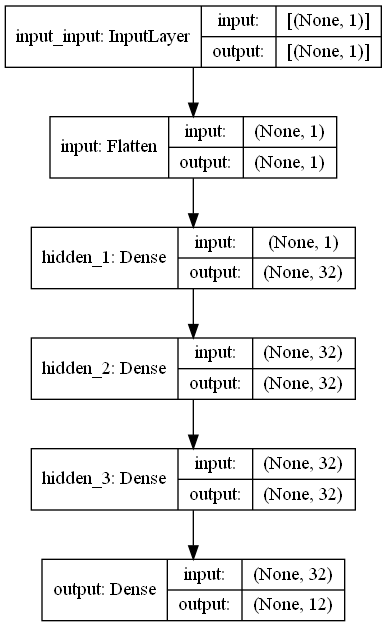

In [8]:
plot_model(model, show_shapes=True)

In [9]:
model_dir = 'models'
callbacks = []
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=100, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 128
epochs = 10000

# Train

In [10]:
trainHistory = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, Y_val),
    callbacks=callbacks
)

Epoch 1/10000
7/7 [==============================] - 1s 45ms/step - loss: 2.6266 - binary_accuracy: 0.9167 - val_loss: 2.6658 - val_binary_accuracy: 0.9167
Epoch 2/10000
7/7 [==============================] - 0s 9ms/step - loss: 2.5324 - binary_accuracy: 0.9167 - val_loss: 2.5894 - val_binary_accuracy: 0.9167
Epoch 3/10000
7/7 [==============================] - 0s 9ms/step - loss: 2.4797 - binary_accuracy: 0.9167 - val_loss: 2.5418 - val_binary_accuracy: 0.9167
Epoch 4/10000
7/7 [==============================] - 0s 9ms/step - loss: 2.4476 - binary_accuracy: 0.9167 - val_loss: 2.5170 - val_binary_accuracy: 0.9167
Epoch 5/10000
7/7 [==============================] - 0s 9ms/step - loss: 2.4289 - binary_accuracy: 0.9167 - val_loss: 2.4925 - val_binary_accuracy: 0.9167
Epoch 6/10000
7/7 [==============================] - 0s 9ms/step - loss: 2.4117 - binary_accuracy: 0.9167 - val_loss: 2.4707 - val_binary_accuracy: 0.9167
Epoch 7/10000
7/7 [==============================] - 0s 9ms/step - lo

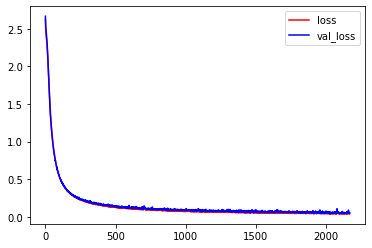

In [11]:
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

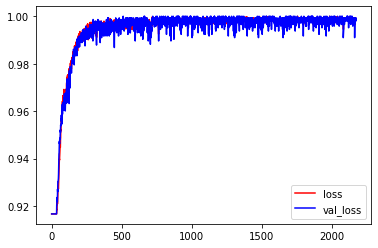

In [12]:
plt.plot(trainHistory.history['binary_accuracy'], color='r', label='loss')
plt.plot(trainHistory.history['val_binary_accuracy'], color='b', label='val_loss')
plt.legend()
plt.show()

In [13]:
model.save('model.h5')

# Test

In [4]:
timeStr = "11/19"
x_test = (header.timeStrToDay(timeStr) - 1) / (365 - 1)
predicted = model.predict([x_test])
for i, pre in enumerate(predicted[0]):
    print(f"{header.tag_indexs[i]} : {int(pre * 100)}%")

摩羯座 : 0%
水瓶座 : 0%
雙魚座 : 0%
牡羊座 : 0%
金牛座 : 0%
雙子座 : 0%
巨蟹座 : 0%
獅子座 : 0%
處女座 : 0%
天秤座 : 0%
天蠍座 : 85%
射手座 : 14%


In [5]:
x_test = []
y_test = []
for i in range(1, 366):
    timeStr = header.dayToTimeStr(i)
    x_test.append((header.timeStrToDay(timeStr) - 1) / (365 - 1))
    y_test.append(header.timeStrToConstellation(timeStr))
predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, -1)
# pd.crosstab(y_test, predictions_classes, rownames=['實際值'], colnames=['預測值'])

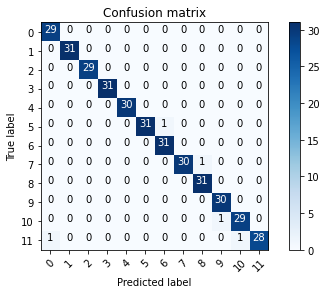

In [6]:
import header
header.plot_confusion_matrix(y_test, predictions_classes)